# Multisensory integration 

In [107]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 

# Filmworld

In [15]:
num_cycle = 6 
num_points_per_cycle = 201

x = np.linspace(-np.pi * num_cycle, np.pi * num_cycle, num_points_per_cycle * num_cycle)
sin_x = np.sin(x)

num_y_pixel = num_points_per_cycle * num_cycle
sin_x_2D = np.tile(sin_x, (num_y_pixel, 1))

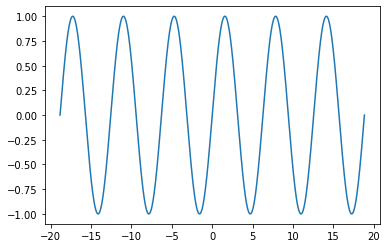

In [16]:
fig, ax = plt.subplots()
ax.plot(x, sin_x)

[]

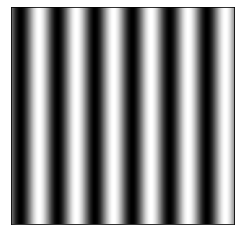

In [25]:
fig, ax1 = plt.subplots()
fig.set_size_inches(4, 4)
im = ax1.imshow(sin_x_2D, aspect='auto', cmap='binary')
ax1.set_xticks([])
ax1.set_yticks([])

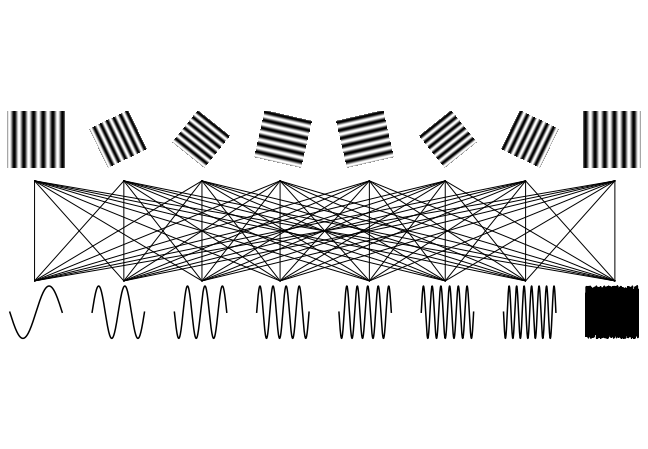

In [111]:
from scipy import ndimage
from matplotlib.patches import ConnectionPatch
import itertools
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

num_frequency = 8
num_orientations = 8

x_loc_list = np.linspace(0, 1, num_orientations)
degree_list = np.linspace(0, 180, num_orientations)
sound_frequency_list = np.arange(1, num_orientations) * 1000
num_cycle_list = np.arange(1, num_orientations)

grating_width = 0.1
grating_height = 0.1

for x_loc, degree in zip(x_loc_list, degree_list):
    
    grating_1 = fig.add_axes([x_loc, 0.6, grating_width, grating_height])
    grating_1.imshow(ndimage.rotate(sin_x_2D, degree, cval=1), aspect='auto', cmap='gray')
    grating_1.axis('off')

    # grating_1 = fig.add_axes([0.2, 0.5, 0.15, 0.15])
    # grating_1.imshow(sin_x_2D, aspect='auto', cmap='gray')
    # grating_1.axis('off')
    
    
for x_loc, num_cycle in zip(x_loc_list, num_cycle_list):
    
    sound_freq = fig.add_axes([x_loc, 0.3, grating_width, grating_height])
    
    x = np.linspace(-np.pi * num_cycle, np.pi * num_cycle, num_points_per_cycle * num_cycle)
    sin_x = np.sin(x)
    sound_freq.plot(x, sin_x, color='black')
    sound_freq.axis('off')


# add white noise to the end 

white_noise = fig.add_axes([x_loc_list[-1], 0.3, grating_width, grating_height])
white_noise.plot(x, np.random.rand(len(x)), color='black')
white_noise.axis('off')


# connect subplots 
line_y_start = 0.6
line_y_end = 0.37

cp_list = list()

x_loc_list_custom_list = [-0.1, 0.1, 0.275, 0.45, 0.65, 0.82, 1, 1.2]

for line_x_start, line_x_end in itertools.product(x_loc_list_custom_list, x_loc_list_custom_list):

    cp1 = ConnectionPatch((line_x_start, line_y_end), (line_x_end, line_y_start), "axes fraction", "axes fraction",
                      axesA=ax, axesB=ax)

    cp_list.append(cp1)

for cp in cp_list:
    ax.add_artist(cp)

# ax.set_xlim([-0.5, 2.5])

hide_main_axis = True
# Turn off main axis 

if hide_main_axis:
    ax.axis('off')

fig_name = 'orientation_pure_tone_combinations.png'
fig_folder = os.path.join('/home/timsit/msi-presentations/figures')
fig.savefig(os.path.join(fig_folder, fig_name), dpi=300, bbox_inches='tight')

In [93]:
x_loc_list[0]

0.0